# Rain Estimation

## Import libraries

In [2]:
# from sklearn import svm   
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import matplotlib.pyplot as plt

## Load data

In [3]:
import pandas as pd  
import numpy as np

complete_df = pd.read_csv("/home/gab/projetos/machine-learning/rain-estimation/Dados_Radar_Estacao_Completo_2018_2022.csv")
complete_df

,Unnamed: 0,azimuth,range,time,elevation,sweep,UH,UV,DBZH,DBZV,...,y,z,lat,lon,alt,Est,Tp_est,latitude,longitude,distancia
0,0,10,220250,2018-01-09 12:30:00,0.5,0,NaN,NaN,NaN,NaN,...,216798.04,4775.95,-22.919829,-53.156094,4895.951230,Loanda,0.0,-22.92,-53.15,219
1,1,15,73750,2018-01-09 12:30:00,0.5,0,-8.03,NaN,-9.92,NaN,...,71227.13,963.36,-24.229322,-53.341064,1083.357738,Porto_Formosa,0.0,-24.23,-53.33,74
2,2,29,226750,2018-01-09 12:30:00,0.5,0,6.00,5.17,4.74,3.38,...,198219.24,5003.38,-23.083564,-52.455313,5123.382761,Paranavai,0.2,-23.09,-52.44,230
3,3,52,144750,2018-01-09 12:30:00,0.5,0,NaN,NaN,NaN,NaN,...,89091.74,2496.08,-24.064595,-52.406170,2616.080788,Campo_Mourao,0.0,-24.07,-52.40,152
4,4,57,66750,2018-01-09 12:30:00,0.5,0,NaN,-8.08,NaN,NaN,...,36350.03,844.52,-24.542079,-52.975897,964.515047,Ubirata,0.0,-24.55,-52.97,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856374,2856374,149,121500,2022-12-22 12:45:00,0.5,0,4.77,4.75,3.81,4.09,...,-104121.77,1928.94,-25.805085,-52.904342,2048.943578,Bela_Vista_Jusante,0.0,-25.81,-52.91,124
2856375,2856375,176,73500,2022-12-22 12:45:00,0.5,0,0.00,-1.49,-1.73,-2.94,...,-73310.80,959.20,-25.529292,-53.478188,1079.201517,Reservatorio_Salto_Caxias,0.0,-25.53,-53.48,73
2856376,2856376,297,21500,2022-12-22 12:45:00,0.5,0,27.52,30.50,NaN,NaN,...,9760.19,214.65,-24.782105,-53.719021,334.650059,Toledo,0.0,-24.78,-53.72,23
2856377,2856377,320,115500,2022-12-22 12:45:00,0.5,0,3.77,4.00,2.45,2.17,...,88458.82,1792.68,-24.072698,-54.260372,1912.675465,Guaira,0.0,-24.07,-54.26,119


## Data treatment

In [4]:
# remove unnecessary columns
clean_df = complete_df.copy()
clean_df.drop(columns=['Unnamed: 0', 'range', 'sweep', 'Est', 'x', 'y', 'z', 'latitude', 'longitude', 'distancia'], inplace=True)
clean_df = clean_df[clean_df['Tp_est'] != 0]
clean_df

,azimuth,time,elevation,UH,UV,DBZH,DBZV,KDP,ZDR,RHOHV,lat,lon,alt,Tp_est
2,29,2018-01-09 12:30:00,0.5,6.00,5.17,4.74,3.38,1.84,1.33,0.68,-23.083564,-52.455313,5123.382761,0.2
21,29,2018-01-09 13:00:00,0.5,NaN,NaN,NaN,NaN,NaN,0.09,0.55,-23.083564,-52.455313,5123.382761,0.2
40,29,2018-01-09 13:30:00,0.5,NaN,NaN,NaN,NaN,NaN,1.28,0.49,-23.083564,-52.455313,5123.382761,0.2
59,29,2018-01-09 14:00:00,0.5,5.32,5.60,2.11,1.82,0.25,0.22,0.73,-23.083564,-52.455313,5123.382761,0.2
76,10,2018-01-09 14:30:00,0.5,NaN,NaN,NaN,NaN,NaN,0.22,0.46,-22.919829,-53.156094,4895.951230,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854605,126,2022-12-20 21:15:00,0.5,NaN,NaN,NaN,NaN,NaN,4.45,0.41,-25.786753,-52.117784,3441.465115,2.8
2854624,126,2022-12-20 21:30:00,0.5,NaN,NaN,NaN,NaN,NaN,-1.06,0.39,-25.786753,-52.117784,3441.465115,0.2
2854643,126,2022-12-20 21:45:00,0.5,NaN,NaN,NaN,NaN,NaN,0.50,0.21,-25.786753,-52.117784,3441.465115,0.2
2854657,15,2022-12-20 22:00:00,0.5,NaN,NaN,NaN,NaN,NaN,3.10,0.51,-24.229322,-53.341064,1083.357738,0.2


In [5]:
# split data into train and test
train = clean_df.copy()
train = train[train['time'] < '2022-01-01']
train.drop(['time'], axis=1, inplace=True)

test = clean_df.copy()
test = test[test['time'] >= '2022-01-01']
test.dropna(inplace=True)
test.drop(['time'], axis=1, inplace=True)

len(test), len(train)

(10900, 88928)

## PyCaret tests

,Description,Value
0,Session id,4091
1,Target,Tp_est
2,Target type,Regression
3,Original data shape,"(99828, 13)"
4,Transformed data shape,"(99828, 13)"
5,Transformed train set shape,"(88928, 13)"
6,Transformed test set shape,"(10900, 13)"
7,Numeric features,12
8,Rows with missing values,53.8%
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1473,4.9174,2.2175,0.0009,0.5683,2.4902
1,1.0721,4.1927,2.0476,0.0062,0.5458,2.2682
2,1.1029,4.4861,2.1180,0.0043,0.5527,2.2373
3,1.0243,3.6236,1.9036,0.0077,0.5290,2.1606
4,1.0861,4.4294,2.1046,0.0055,0.5514,2.5249
5,1.0509,3.9388,1.9846,0.0043,0.5382,2.1778
6,1.0367,3.9180,1.9794,0.0034,0.5371,2.3377
7,1.1035,4.5676,2.1372,0.0078,0.5529,2.3130
8,1.0515,3.8041,1.9504,0.0101,0.5370,2.2003


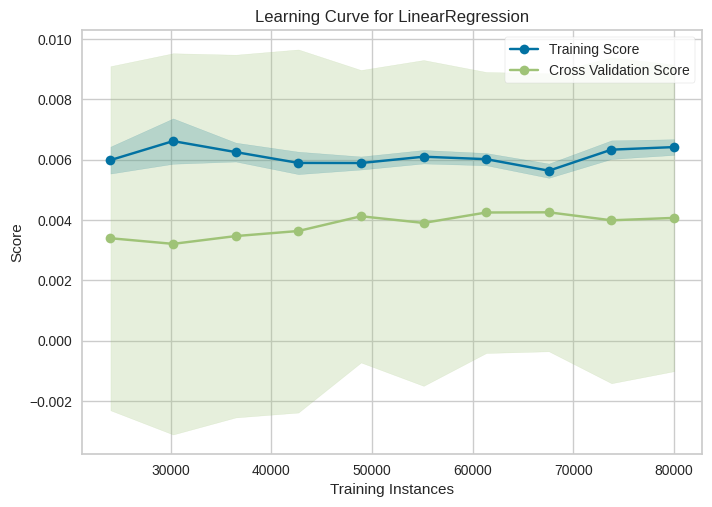

In [25]:
import pycaret.regression as pyr

s = pyr.setup(data=train, target='Tp_est', test_data=test)

best = pyr.create_model('lr')
pyr.plot_model(best, plot='learning')

## Data distribution treatment

/tmp/ipykernel_134253/1850416271.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  count.index = count.index.str.split(',').str[0].str.replace('(', '')


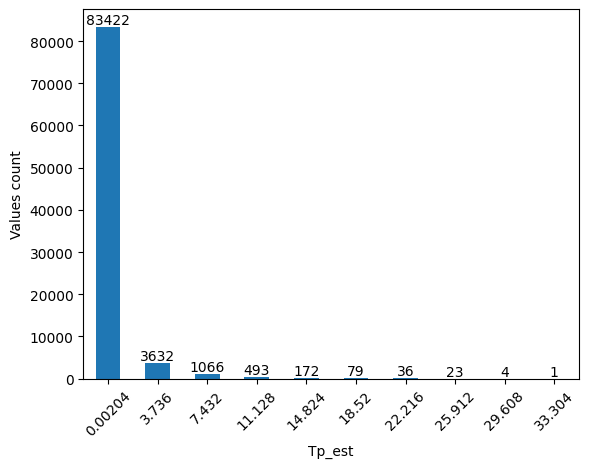

In [9]:
import matplotlib.pyplot as plt

def visualize(df, column):
    # count column values into bins
    count = df[column].value_counts(bins=10)
    count.index = count.index.astype(str)
    count.index = count.index.str.split(',').str[0].str.replace('(', '')
    count.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.ylabel('Values count')
    plt.xlabel(df[column].name)
    plt.bar_label(plt.gca().containers[0])

    plt.show()

visualize(train, 'Tp_est')


In [11]:
from sklearn.impute import SimpleImputer

imp =  SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train)
train_imp = imp.transform(train)
train_imp = pd.DataFrame(train_imp, columns=train.columns)
# train_imp.dropna(inplace=True)

train_imp


,azimuth,elevation,UH,UV,DBZH,DBZV,KDP,ZDR,RHOHV,lat,lon,alt,Tp_est
0,29.0,0.5,6.000000,5.170000,4.740000,3.38000,1.840000,1.33,0.68,-23.083564,-52.455313,5123.382761,0.2
1,29.0,0.5,17.082063,17.750863,13.266632,14.34243,0.049063,0.09,0.55,-23.083564,-52.455313,5123.382761,0.2
2,29.0,0.5,17.082063,17.750863,13.266632,14.34243,0.049063,1.28,0.49,-23.083564,-52.455313,5123.382761,0.2
3,29.0,0.5,5.320000,5.600000,2.110000,1.82000,0.250000,0.22,0.73,-23.083564,-52.455313,5123.382761,0.2
4,10.0,0.5,17.082063,17.750863,13.266632,14.34243,0.049063,0.22,0.46,-22.919829,-53.156094,4895.951230,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88923,10.0,0.5,10.580000,9.150000,9.460000,8.64000,0.320000,1.92,0.65,-22.919829,-53.156094,4895.951230,1.2
88924,10.0,0.5,10.980000,12.630000,9.300000,9.96000,0.090000,-1.15,0.68,-22.919829,-53.156094,4895.951230,0.4
88925,29.0,0.5,10.860000,11.350000,9.190000,9.97000,0.650000,0.01,0.72,-23.083564,-52.455313,5123.382761,0.6
88926,29.0,0.5,17.082063,17.750863,13.266632,14.34243,0.049063,0.50,0.30,-23.083564,-52.455313,5123.382761,0.2


88928
125672


/tmp/ipykernel_134253/1850416271.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  count.index = count.index.str.split(',').str[0].str.replace('(', '')


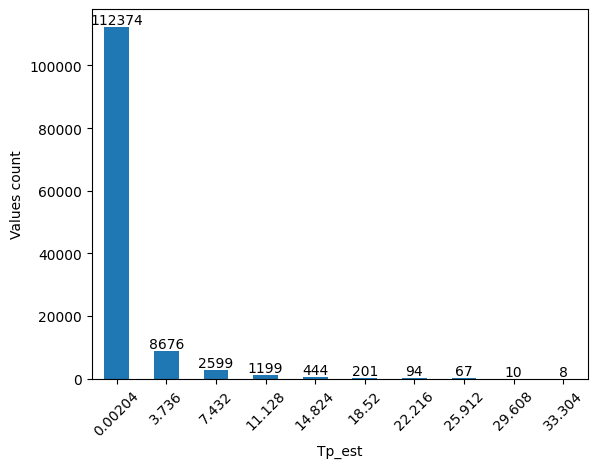

In [18]:
# oversample train data (float values)

from sklearn.utils import resample

# oversample minority class
train_majority = train_imp[train_imp['Tp_est'] < 1]
train_minority = train_imp[train_imp['Tp_est'] >= 1]

train_minority_upsampled = resample(train_minority,
                                    replace=True,
                                    n_samples=len(train_majority),
                                    random_state=123)


train_oversampled = pd.concat([train_majority, train_minority_upsampled])

print(len(train_imp))
print(len(train_oversampled))
visualize(train_oversampled, 'Tp_est')


/tmp/ipykernel_134253/1850416271.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  count.index = count.index.str.split(',').str[0].str.replace('(', '')


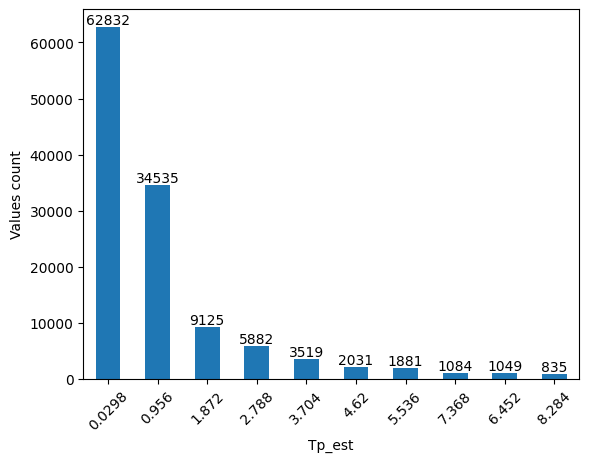

In [19]:
# remove outliers

from scipy import stats

train_inliners = train_oversampled[(np.abs(stats.zscore(train_oversampled['Tp_est'])) < 3)]
visualize(train_inliners, 'Tp_est')

# from sklearn.neighbors import LocalOutlierFactor

# lof = LocalOutlierFactor(n_neighbors=20)
# lof.fit(train_oversampled)
# outliers = lof.fit_predict(train_oversampled)

# # remove outliers
# train_inliners = train_oversampled[outliers != -1]
# visualize(train_inliners, 'Tp_est')


## Train model

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train = train_inliners.drop(['Tp_est'], axis=1)
y_train = train_inliners['Tp_est']

regr = make_pipeline(
    # KNNImputer(),  
    # SimpleImputer(),
    StandardScaler(with_mean=True, with_std=True),
    LinearRegression(n_jobs=-1)
)

regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [ ]:
import joblib
from datetime import datetime
joblib.dump(regr, f"rain-estimation-{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.pkl", compress=True)

['rain-estimation-2023-10-08-16-17-42.pkl']

## Test model

MSE: 4.221700073884865
MAE: 1.2168888737113606


Text(0, 0.5, 'Prediction')

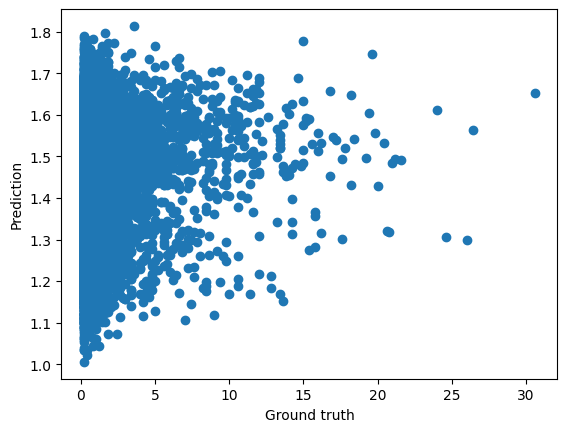

In [21]:
x_test = test.drop(['Tp_est'], axis=1)
y_test = test['Tp_est']

y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

plt.scatter(y_test, y_pred)
plt.xlabel('Ground truth')
plt.ylabel('Prediction')

# sample = test.sample(1000)
# sample_pred = regr.predict(sample.drop(['Tp_est'], axis=1))
# plt.scatter(sample['Tp_est'], sample_pred)
# plt.xlabel('Ground truth')
# plt.ylabel('Prediction')
